# Introduction
RMS Titanic was a British passenger liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time.It remains the deadliest peacetime sinking of an ocean liner or cruise ship.

***Content:***

1. [Load And Check Data](#1)
1. [Variable Descripction](#2)
1. [Analysis The Variables](#3)
    1. [Sex](#4)
    1. [Age](#5)
    1. [Pclass](#6)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id="1"></a><br>
# Load And Check Data

In [2]:
trainDf = pd.read_csv("/kaggle/input/titanic/train.csv")
testDf = pd.read_csv("/kaggle/input/titanic/test.csv")
testPassengerId = testDf["PassengerId"]

In [3]:
trainDf.info() # We learn how many columns and there are and what type they are.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
trainDf.isnull().sum() # I'm checking for null data.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id = "2"></a>
## Variable Description
> I'm writing a clean markdown based on the analysis we've done
1. **PassengerId:** Unique number for each passenger --> int64
1. **Survived :** 0 = No , 1 = Yes --> int64
1. **Pclass :** Ticket class --> int64
1. **Name :** Name of passenger --> object
1. **Sex :** Sex --> object
1. **Age :** Age in years -->float64
1. **SibSp :** Do you have siblings or spouses on board? 0 = No, 1 = Yes --> int64
1. **Parch :** Do you have Parent or children on board? 0 = No, 1 = Yes --> int64
1. **Ticket :** Ticket number --> object
1. **Fare :** Passenger fare --> float64
1. **Cabin :** Cabin Id --> object
1. **Embarked :** Port of embarkation C = Cherbourg, Q = Queenstown, S = Southampton --> object


How many people **survived**? Let's analyze it

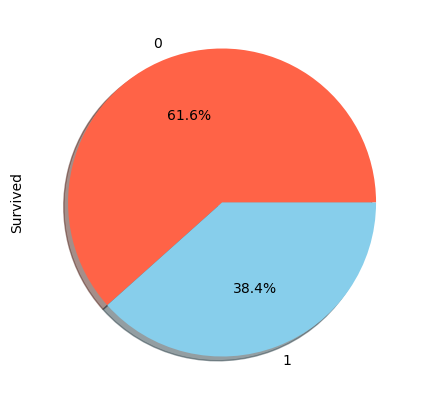

In [5]:
colors = ["#FF6347","skyblue"] # Colors Set
f,ax=plt.subplots(figsize=(5,5))
trainDf.Survived.value_counts().plot.pie(autopct='%1.1f%%',ax=ax,colors=colors,shadow=True)
plt.show()

61 percent of the 891 passengers in the training set did not survive, that is, approximately 543 people lost their lives. Now let's look at survival conditions

<a id = '3'></a>
# Analysing The Variables

<a id = "4"></a>
#### **Sex:**

In [6]:
trainDf.groupby(["Sex","Survived"]).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

If we look at the data, **the death rate of women is very low**, let's take a closer look at it.

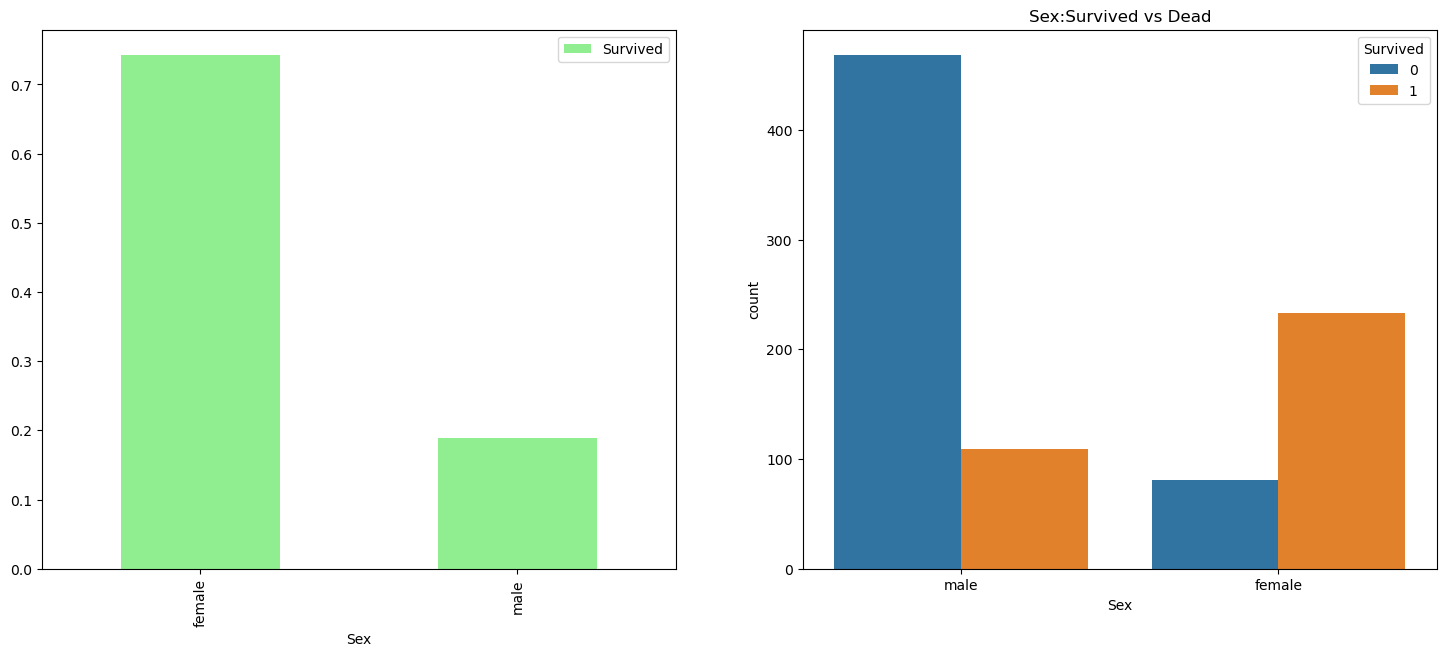

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,7))
trainDf[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0],color="lightgreen")
sns.countplot(x='Sex', hue='Survived', data=trainDf, ax=ax[1])
plt.title("Sex:Survived vs Dead")
plt.show()

As we can see here with certainty, 75% of women survive, while men only 19%.

<a id = "5"></a>
#### **Age**:
Now let's look at how deaths in the titanic disaster related to age.

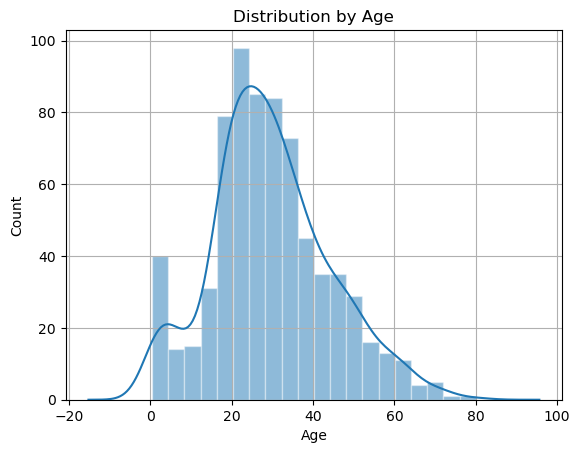

In [8]:
sns.histplot(trainDf["Age"],kde=True,kde_kws=dict(cut=4),edgecolor=(1,1,1,.4))
plt.title("Distribution by Age")
plt.grid()
plt.show()

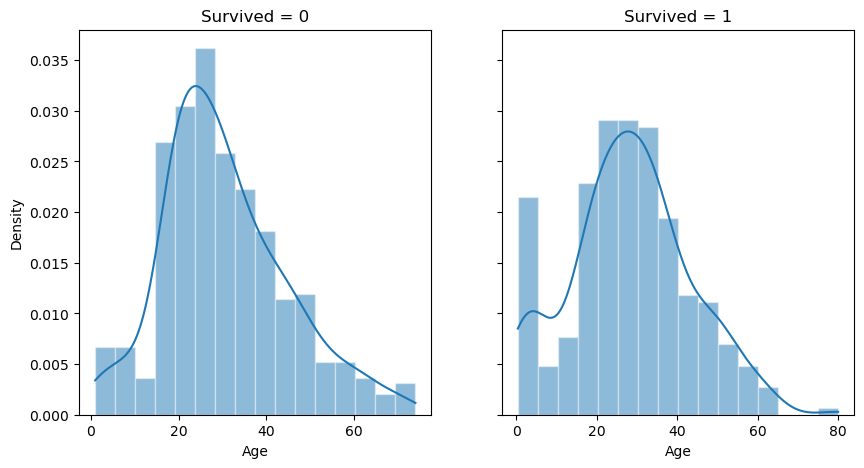

In [9]:
fig,ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

survived_0_data = trainDf[trainDf['Survived'] == 0]['Age']
survived_1_data = trainDf[trainDf['Survived'] == 1]['Age']
sns.histplot(survived_0_data, kde=True, edgecolor=(1, 1, 1, .4), stat='density', ax=ax[0])
ax[0].set_title('Survived = 0')

sns.histplot(survived_1_data, kde=True, edgecolor=(1, 1, 1, .4), stat='density', ax=ax[1])
ax[1].set_title('Survived = 1')

ax[0].set_xlabel('Age')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Age')
plt.show()

Roughly, we see that the highest number of deaths occurred between the ages of 20 and 40. To get a clearer data, let's divide the ages into certain groups and examine them again.

In [10]:
trainDf.Age.max() # Finding the boundary value for interval

80.0

In [11]:

interval = (0, 5, 12, 18, 25, 35, 80)

filters = ['Babies', 'Children', 'Teen' ,'Young', 'Adult', 'Senior']
trainDf["Age_filters"] = pd.cut(trainDf.Age, interval, labels=filters)
trainDf.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


After grouping the ages, let's see how many age groups there are.

In [12]:
age_counts = trainDf.groupby("Age_filters").size()
age_counts

Age_filters
Babies       44
Children     25
Teen         70
Young       162
Adult       196
Senior      217
dtype: int64

Now let's **visualize this data** and make it more readable.

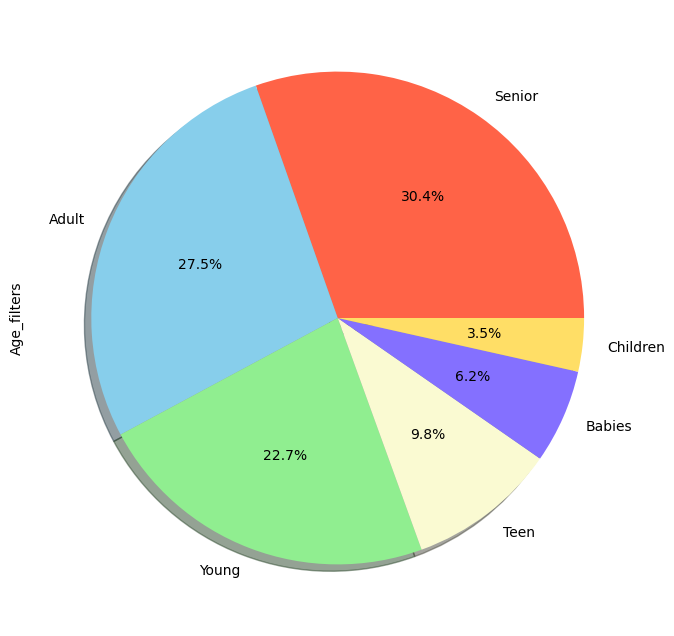

In [13]:
colors = ["#FF6347","skyblue","lightgreen","#fafad2","#8470ff","#ffde66"] # Colors Set
f,ax = plt.subplots(figsize=(10,8))

trainDf["Age_filters"].value_counts().plot.pie(autopct="%1.1f%%",ax=ax,shadow=True,colors=colors)
plt.show()

We saw the distribution of age groups. Now let's look at the numbers of survivors and non-survivors of these age groups in graph form.

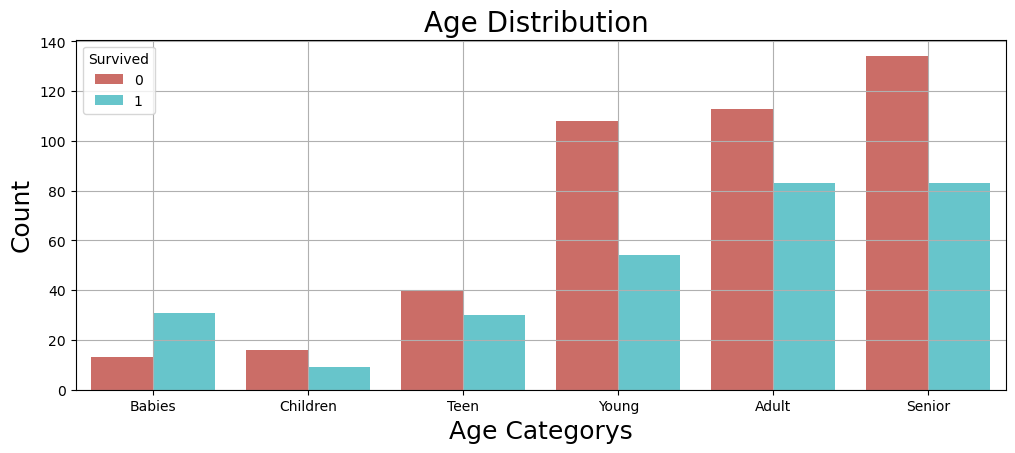

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(x="Age_filters",data=trainDf,hue="Survived", palette="hls")
plt.ylabel("Count", fontsize = 18)
plt.xlabel("Age Categorys", fontsize = 18)
plt.title("Age Distribution ", fontsize = 20)
plt.grid()
plt.show()

<a id = "6"></a>
#### Pclass:

In [15]:
pd.crosstab(trainDf.Pclass,trainDf.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


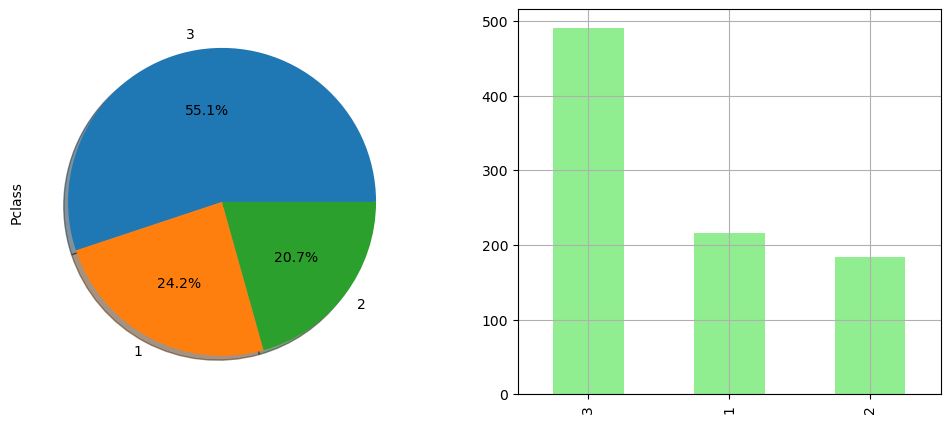

In [16]:
f,ax=plt.subplots(1,2,figsize=(12,5))
trainDf["Pclass"].value_counts().plot.pie(autopct="%1.1f%%",ax=ax[0], shadow=True)
trainDf["Pclass"].value_counts().plot.bar(ax=ax[1],color="lightgreen")
plt.grid()
plt.show()

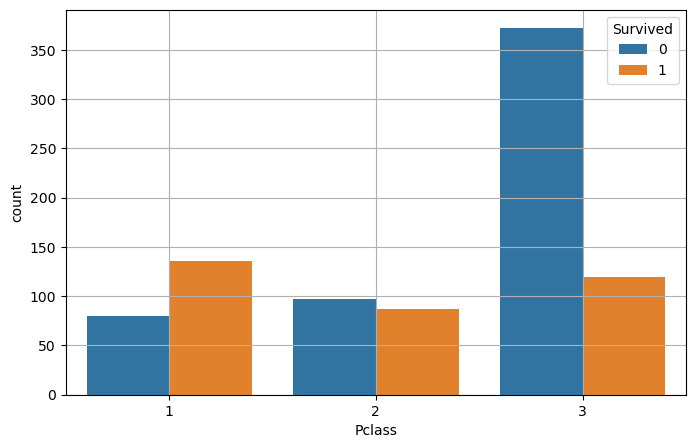

In [17]:
f, ax = plt.subplots(figsize=(8,5))
sns.countplot(x="Pclass",hue="Survived",data=trainDf,ax=ax)
plt.grid()
plt.show()

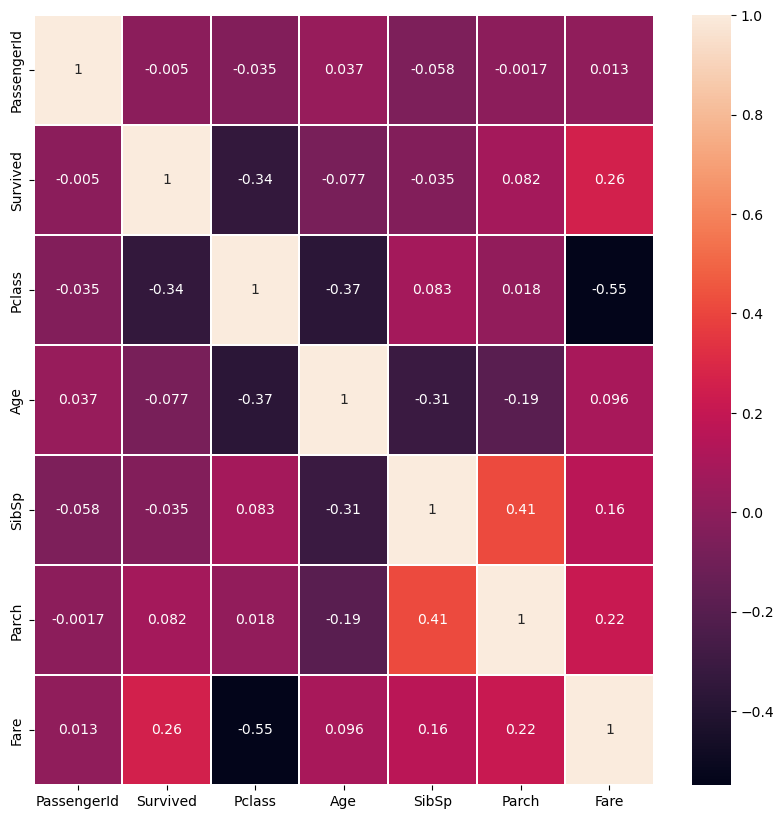

In [18]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(trainDf.corr(numeric_only=True),annot=True,linewidths=.1)
plt.show()

By looking at the correlation data, **it can be seen that survival is linked to wages.** Let's take a closer look at this

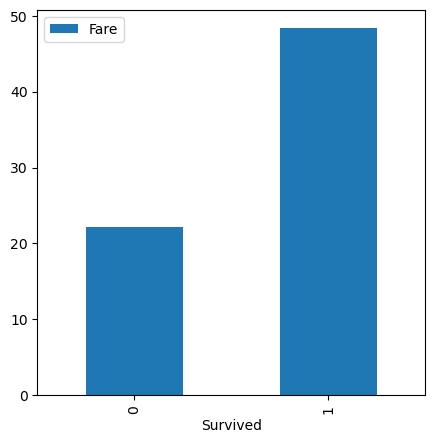

In [19]:
f,ax=plt.subplots(figsize=(5,5))
trainDf[['Survived','Fare']].groupby(['Survived']).mean().plot.bar(ax=ax)
plt.show()

The vast majority of **survivors paid higher fares for the ticket**. :(